In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
# read transaction data set
orders=pd.read_csv('transaction_data.csv')
print(orders.head())

   Unnamed: 0  BASKET_NUM  HSHD_NUM PURCHASE_DATE  PRODUCT_NUM  SPEND_AMOUNT  \
0           1       99471         1     13-Mar-16        86729          2.69   
1           2      483288         1      7-Dec-16       205956          1.99   
2           3      588333         1     19-Feb-17       654440          1.99   
3           4      749890         1     13-Jun-17      6222202          1.00   
4           5      219384         1      5-Jun-16       100273          3.54   

   UNITS STORE_REGION  WEEK_NUM  YEAR  
0      1         EAST        11  2016  
1      1         EAST        49  2016  
2      1         EAST        60  2017  
3      1         EAST        76  2017  
4      6         EAST        23  2016  


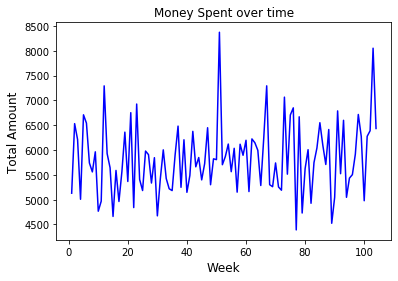

In [3]:
# extract spend_amount group by week_num
amount=[]
for i in range(1,105):
    amount.append(sum(orders[orders['WEEK_NUM']==i].SPEND_AMOUNT))
# show a plot of money spent each week over time
plt.plot(range(1,105),amount,color='blue')
plt.title('Money Spent over time')
plt.xlabel('Week',size=12)
plt.ylabel('Total Amount',size=12)
plt.show()

In [4]:
# read household data set
customers=pd.read_csv('household_data.csv')
print(customers.head())

   HSHD_NUM Loyalty_flag AGE_RANGE  MARITAL INCOME_RANGE  HOMEOWNER  \
0         1            Y     55-64  Married        150K+  Homeowner   
1         2            Y     45-54  Married        150K+  Homeowner   
2         3            Y     55-64  Married       50-74K  Homeowner   
3         4            Y     35-44   Single     100-150K  Homeowner   
4         5            Y     45-54  Married       35-49K     Renter   

    HSHD_COMPOSITION HH_SIZE       CHILDREN  
0  2 Adults and Kids       3              1  
1  2 Adults and Kids      5+             3+  
2           2 Adults       2  NOT AVAILABLE  
3   1 Adult and Kids       3              2  
4  2 Adults and Kids       3              1  


In [5]:
# extract total amount of money spent,age range, maritage condition, income range, and size for each household
amount2=pd.DataFrame(columns=['HSHD_NUM','TOTAL_AMOUNT','AGE_RANGE','MARITAGE_CONDITION','INCOME_RANGE','SIZE'])
for item in customers['HSHD_NUM']:
    amount2=amount2.append({'HSHD_NUM':item,'TOTAL_AMOUNT':sum(orders[orders['HSHD_NUM']==item].SPEND_AMOUNT),
                            'AGE_RANGE':customers[customers['HSHD_NUM']==item].AGE_RANGE.values[0],
                            'MARITAGE_CONDITION':customers[customers['HSHD_NUM']==item].MARITAL.values[0],
                            'INCOME_RANGE':customers[customers['HSHD_NUM']==item].INCOME_RANGE.values[0],
                            'SIZE':customers[customers['HSHD_NUM']==item].HH_SIZE.values[0]},ignore_index=True)
# clean data
amount2=amount2[(amount2['AGE_RANGE']!=pd.np.nan)&(amount2['AGE_RANGE']!='NOT AVAILABLE')]
amount2=amount2[~amount2['MARITAGE_CONDITION'].isin(['Unknown','null'])]
amount2=amount2[~amount2['INCOME_RANGE'].isin(['null'])]
amount2=amount2[~amount2['SIZE'].isin(['null'])]
amount2=amount2.dropna()
amount2=amount2.reset_index(drop=True)
amount2.head()

,HSHD_NUM,TOTAL_AMOUNT,AGE_RANGE,MARITAGE_CONDITION,INCOME_RANGE,SIZE
0,1,4113.94,55-64,Married,150K+,3
1,2,17056.25,45-54,Married,150K+,5+
2,3,10058.46,55-64,Married,50-74K,2
3,4,27495.49,35-44,Single,100-150K,3
4,5,15005.58,45-54,Married,35-49K,3


In [6]:
amount2.groupby(['AGE_RANGE']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).TOTAL_AMOUNT

,mean,median,count_nonzero,std
AGE_RANGE,,,,
19-24,11649.425000,11649.425,2.0,6240.521400
25-34,10393.940000,5849.700,6.0,13186.998802
35-44,8324.369231,3656.890,13.0,10646.939299
45-54,6939.087619,2029.310,21.0,10378.424651
55-64,6629.178261,5991.200,23.0,6320.021463
65-74,2378.447857,162.675,14.0,3326.352700
75+,4797.982857,5079.130,7.0,3749.009915


In [7]:
amount2.groupby(['MARITAGE_CONDITION']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).TOTAL_AMOUNT

,mean,median,count_nonzero,std
MARITAGE_CONDITION,,,,
Married,6270.501552,4102.290,58.0,8121.899887
Single,6973.796071,4323.415,28.0,9047.833946


In [8]:
amount2.groupby(['INCOME_RANGE']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).TOTAL_AMOUNT

,mean,median,count_nonzero,std
INCOME_RANGE,,,,
100-150K,9997.969286,7604.915,14.0,10837.398009
150K+,7154.613333,200.520,9.0,14203.122626
35-49K,5568.032105,1202.960,19.0,8572.258258
50-74K,4632.688125,3176.645,16.0,5253.138772
75-99K,7683.989167,7433.510,12.0,7489.896216
UNDER 35K,5154.300000,5534.250,16.0,3578.010916


In [9]:
amount2.groupby(['SIZE']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).TOTAL_AMOUNT

,mean,median,count_nonzero,std
SIZE,,,,
1,7124.877273,5034.535,22.0,8681.331549
2,4430.452857,2029.310,21.0,4694.871863
3,4966.613913,934.430,23.0,7111.578864
4,6042.765000,4620.485,4.0,6374.671240
5+,10672.836875,6153.235,16.0,12354.639633


In [10]:
# ANOVA test for age_range
results = ols('TOTAL_AMOUNT ~ C(AGE_RANGE)', data=amount2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_AMOUNT   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.071
Date:                Tue, 04 Feb 2020   Prob (F-statistic):              0.387
Time:                        11:33:48   Log-Likelihood:                -895.13
No. Observations:                  86   AIC:                             1804.
Df Residuals:                      79   BIC:                             1821.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.165e+04   5916.005      1.969      0.052    -126.088    2.34e+04
C(AGE_RANGE)[T.25-34] -1255.4850   6831.214     -0.184      0.855   -1.49e+04    1.23e+04
C(AGE_RANGE)[T.35-44] -3325.0558   6354.809     -0.523      0.602    -1.6e+04    9323.874
C(AGE_RANGE)[T.45-54] -4710.3374   6191.313     -0.761      0.449    -1.7e+04    7613.164
C(AGE_RANGE)[T.55-64] -5020.2467   6167.861     -0.814      0.418   -1.73e+04    7256.574
C(AGE_RANGE)[T.65-74] -9270.9771   6324.475     -1.466      0.147   -2.19e+04    3317.576
C(AGE_RANGE)[T.75+]   -6851.4421   6708.119     -1.021      0.310   -2.02e+04    6500.735
==============================================================================
Omnibus:                       40.077   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.636
Skew:                           1.684   Prob(JB):                     2.82e-21
Kurtosis:                       6.882   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# ANOVA test for maritage_condition
results = ols('TOTAL_AMOUNT ~ C(MARITAGE_CONDITION)', data=amount2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_AMOUNT   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1314
Date:                Tue, 04 Feb 2020   Prob (F-statistic):              0.718
Time:                        11:33:48   Log-Likelihood:                -898.42
No. Observations:                  86   AIC:                             1801.
Df Residuals:                      84   BIC:                             1806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        6270.5016   1106.995      5.664      0.000    4069.121    8471.882
C(MARITAGE_CONDITION)[T.Single]   703.2945   1940.062      0.363      0.718   -3154.732    4561.321
==============================================================================
Omnibus:                       44.419   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.457
Skew:                           1.869   Prob(JB):                     1.03e-24
Kurtosis:                       7.105   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# ANOVA test for income_range
results = ols('TOTAL_AMOUNT ~ C(INCOME_RANGE)', data=amount2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_AMOUNT   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8251
Date:                Tue, 04 Feb 2020   Prob (F-statistic):              0.535
Time:                        11:33:48   Log-Likelihood:                -896.33
No. Observations:                  86   AIC:                             1805.
Df Residuals:                      80   BIC:                             1819.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     9997.9693   2253.256      4.437      0.000    5513.847    1.45e+04
C(INCOME_RANGE)[T.150K+]     -2843.3560   3602.079     -0.789      0.432      -1e+04    4325.009
C(INCOME_RANGE)[T.35-49K]    -4429.9372   2969.551     -1.492      0.140   -1.03e+04    1479.657
C(INCOME_RANGE)[T.50-74K]    -5365.2812   3085.398     -1.739      0.086   -1.15e+04     774.856
C(INCOME_RANGE)[T.75-99K]    -2313.9801   3316.703     -0.698      0.487   -8914.430    4286.469
C(INCOME_RANGE)[T.UNDER 35K] -4843.6693   3085.398     -1.570      0.120    -1.1e+04    1296.468
==============================================================================
Omnibus:                       40.908   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.541
Skew:                           1.697   Prob(JB):                     1.47e-22
Kurtosis:                       7.067   Cond. No.                         6.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# ANOVA test for size
results = ols('TOTAL_AMOUNT ~ C(SIZE)', data=amount2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_AMOUNT   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.577
Date:                Tue, 04 Feb 2020   Prob (F-statistic):              0.188
Time:                        11:33:48   Log-Likelihood:                -895.27
No. Observations:                  86   AIC:                             1801.
Df Residuals:                      81   BIC:                             1813.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7124.8773   1764.410      4.038      0.000    3614.255    1.06e+04
C(SIZE)[T.2]  -2694.4244   2524.783     -1.067      0.289   -7717.950    2329.101
C(SIZE)[T.3]  -2158.2634   2467.981     -0.875      0.384   -7068.771    2752.244
C(SIZE)[T.4]  -1082.1123   4498.380     -0.241      0.811      -1e+04    7868.253
C(SIZE)[T.5+]  3547.9596   2719.138      1.305      0.196   -1862.272    8958.191
==============================================================================
Omnibus:                       34.711   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.031
Skew:                           1.549   Prob(JB):                     1.69e-15
Kurtosis:                       6.064   Cond. No.                         6.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""